## Diabates.csv 파일을 로드하고, training/test data를 각각 7:3으로 분리한 뒤, Randomforest, AdaBoost, GradientBoosting 성능을 아래 과정을 통해 비교평가하시오.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("Diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### scaling 과정이 필요한 분류기에는 scaling 과정을 포함하시오 (위의 classifier은 필요없음)

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Initialize the classifiers
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()

# Fit the classifiers on the training data
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)
y_pred_ada = ada.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Calculate the accuracy of the predictions
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_gb = accuracy_score(y_test, y_pred_gb)

# Print the accuracy of the predictions
print("Accuracy of Random Forest:", acc_rf)
print("Accuracy of AdaBoost:", acc_ada)
print("Accuracy of Gradient Boosting:", acc_gb)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Print the confusion matrix
print("Confusion Matrix of Random Forest:", cm_rf)
print("Confusion Matrix of AdaBoost:", cm_ada)
print("Confusion Matrix of Gradient Boosting:", cm_gb)

# Generate a classification report
cr_rf = classification_report(y_test, y_pred_rf)
cr_ada = classification_report(y_test, y_pred_ada)
cr_gb = classification_report(y_test, y_pred_gb)

# Print the classification report
print("Classification report of Random Forest:")
print(cr_rf)
print("Classification report of AdaBoost:")
print(cr_ada)
print("Classification report of Gradient Boosting:")
print(cr_gb)



Accuracy of Random Forest: 0.7316017316017316
Accuracy of AdaBoost: 0.7445887445887446
Accuracy of Gradient Boosting: 0.7489177489177489
Confusion Matrix of Random Forest: [[121  30]
 [ 32  48]]
Confusion Matrix of AdaBoost: [[122  29]
 [ 30  50]]
Confusion Matrix of Gradient Boosting: [[120  31]
 [ 27  53]]
Classification report of Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Classification report of AdaBoost:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg    

#### 모든 분류기에 대해 최적화된 파라미터를 찾아 적용하고, 파라미터를 선정하는 과정을 보이고, 선정 근거를 설명하시오

###### GridSearchCV를 사용하여 최적화된 파라미터를 찾을 것이다.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize the GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

# Initialize the GridSearchCV for AdaBoost
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_ada.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best score for AdaBoost:", grid_ada.best_score_)

# Initialize the GridSearchCV for Gradient Boosting
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best score for Gradient Boosting:", grid_gb.best_score_)


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest: 0.7802180685358255
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 10}
Best score for AdaBoost: 0.7542402215299411
Best parameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Gradient Boosting: 0.7671858774662512


#### 각 분류기에서 임의의 decision tree를 하나 선정하여 시각화하시오.

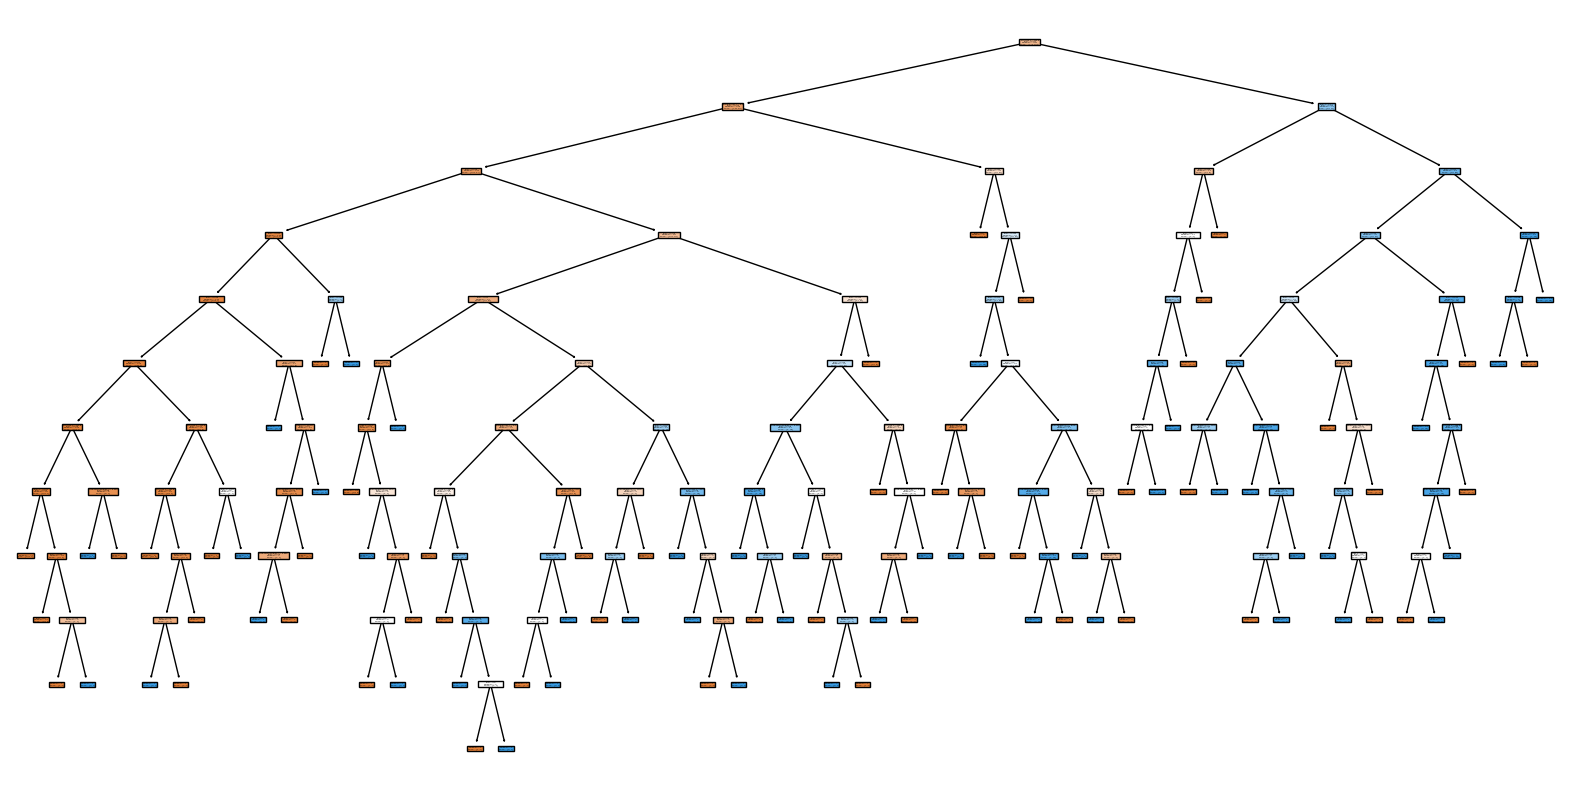

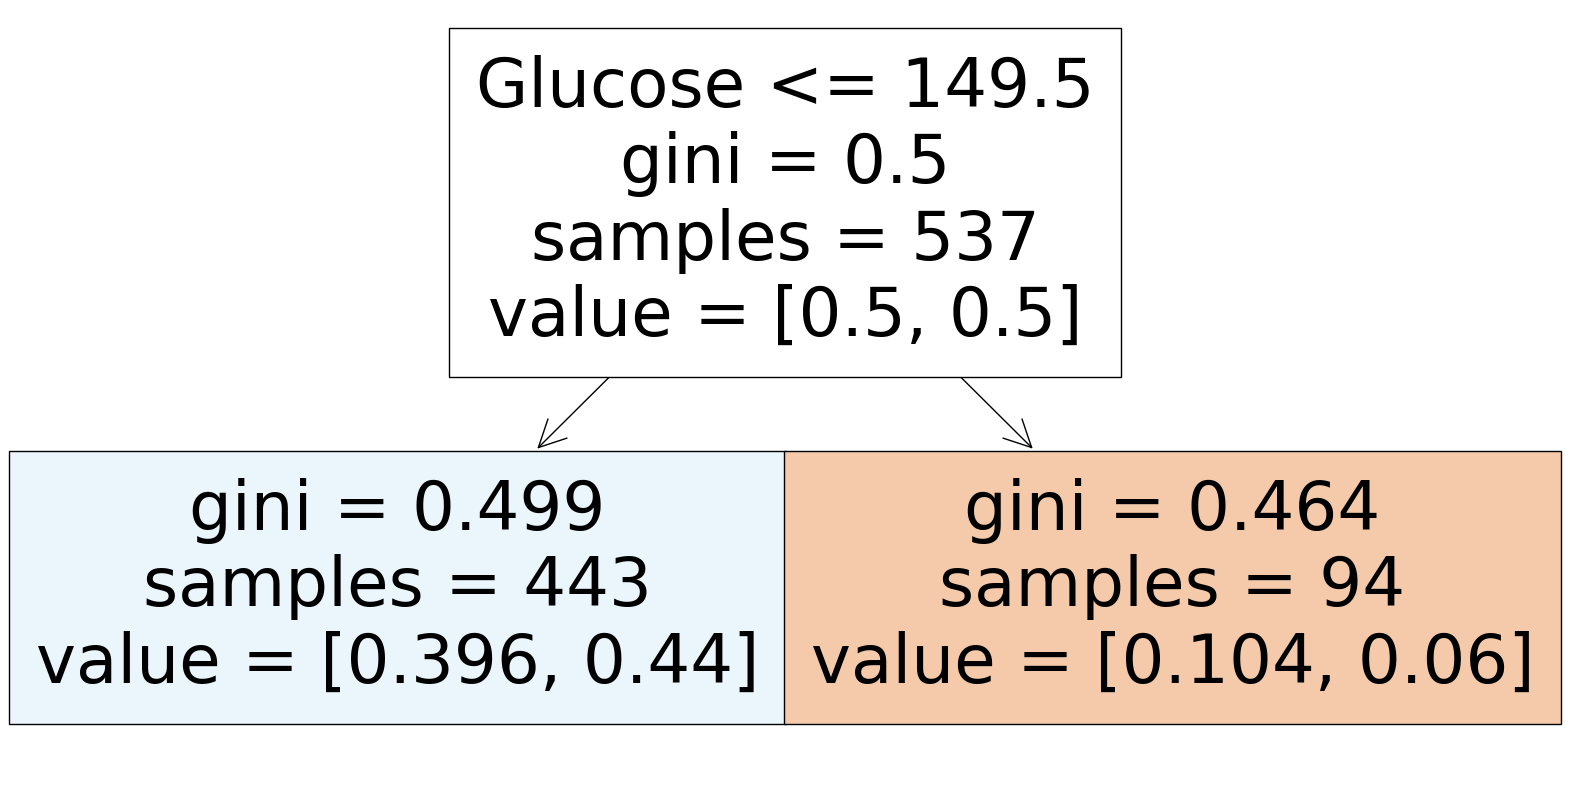

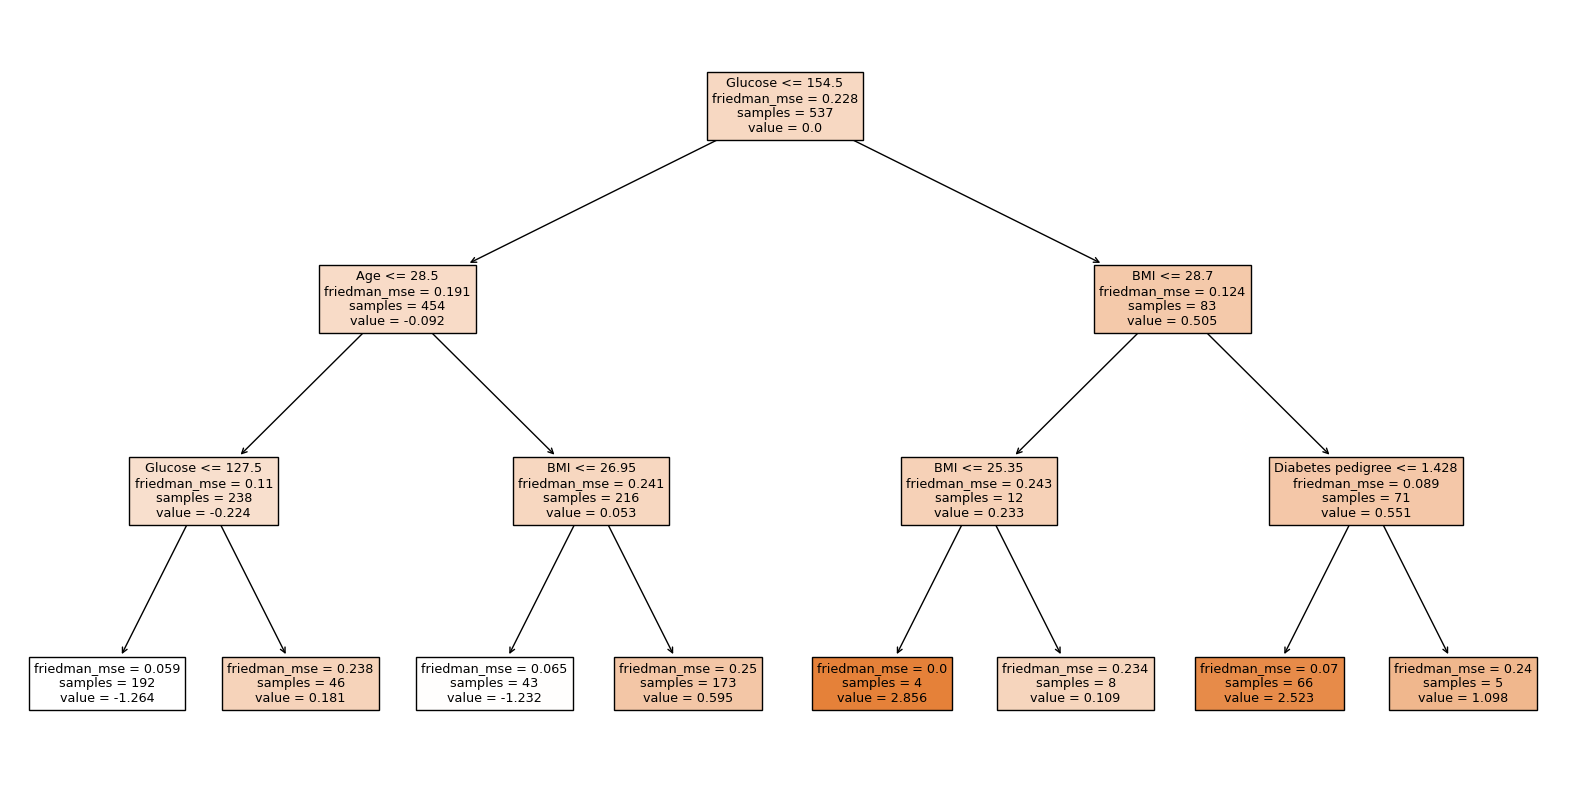

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import random

# Visualize a random decision tree from Random Forest
rf_tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(rf_tree, filled=True, feature_names=X.columns)
plt.show()

# Visualize a random decision tree from AdaBoost
ada_tree = random.choice(ada.estimators_)

plt.figure(figsize=(20, 10))
plot_tree(ada_tree, filled=True, feature_names=X.columns)
plt.show()

# Visualize a random decision tree from Gradient Boosting
gb_tree = gb.estimators_[0, 0]

plt.figure(figsize=(20, 10))
plot_tree(gb_tree, filled=True, feature_names=X.columns)
plt.show()


#### 각 분류기에 대한 ROC curve를 그리고, 결과를 분석하시오.

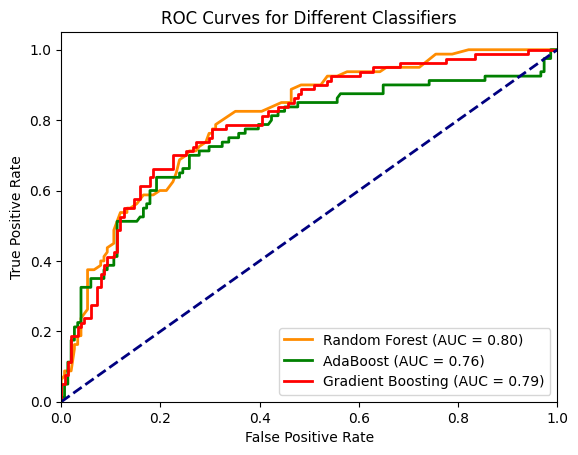

In [17]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each classifier
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_ada = ada.predict_proba(X_test)[:, 1]
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Get the fpr, tpr, and thresholds for the Random Forest classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get the fpr, tpr, and thresholds for the AdaBoost classifier
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Get the fpr, tpr, and thresholds for the Gradient Boosting classifier
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve for the Random Forest classifier
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot the ROC curve for the AdaBoost classifier
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)

# Plot the ROC curve for the Gradient Boosting classifier
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)

# Plot the ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels and formatting to the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.show()
